<a href="https://colab.research.google.com/github/jgannon03/40261450_/blob/master/inverted_pendulum_control_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!pip install control


     |████████████████████████████████| 357 kB 4.3 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=5d1bf3ce10dac276f21580ace931de2280bcd4668c28d3bf31209ff3625eea2e
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


In [4]:
import control as ctrl

G(s) =s+ 3 / s^2 + 5s + 6

In [6]:
num = [1,3]
den = [1,5,6]
G = ctrl.TransferFunction(num,den)

print(G)


    s + 3
-------------
s^2 + 5 s + 6



ctrl.series 

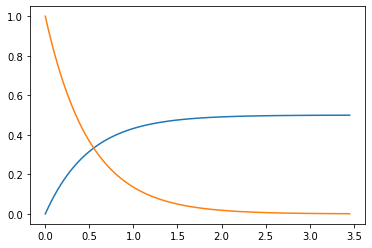

In [13]:
import matplotlib.pyplot as plt

#STEP RESPONSE
t_step, y_step = ctrl.step_response(G)
t_imp, y_imp = ctrl.impulse_response(G)
plt.plot(t_step,y_step)
plt.plot(t_imp, y_imp)
plt.show()

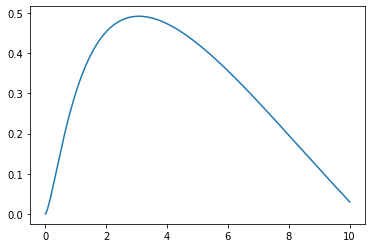

In [18]:
import numpy as np

# create u(t), for t = 0,...,10(5000 points)
t = np.linspace(0,10,5000)
u = np.sin(np.sqrt(t))

res = ctrl.forced_response(G,t,u,0)

plt.plot(res.time,res.outputs)
#plt.show()

$$
G_c(s)= K_c\left(1+\tau_D s+
$$

In [36]:
def pid(kp,ki,kd):
  diff= ctrl.TransferFunction ([1,0],[1])
  integral = ctrl.TransferFunction([1],[1,0])
  Gpid = kp +kd * diff + ki + integral 
  return Gpid

my_pid = pid(1, 0.2,0.01)
print(my_pid)
                             


0.01 s^2 + 1.2 s + 1
--------------------
         s




          -6 s
------------------------
s^3 - 4.8 s^2 - 31 s - 6



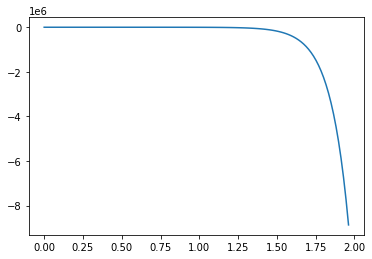

In [44]:
d = 25
c = 6
G_theta = ctrl.TransferFunction(-c,[1,0,-d])
G_c = -pid (1, 0, 0.8)

G_load = ctrl.feedback(G_theta,G_c,sign=1)
print(G_load)

t_imp, theta_imp = ctrl.impulse_response(G_load)
plt.plot(t_imp, theta_imp)
plt.show()